{(0, 1): -1, (0, 2): -1, (0, 3): -1, (0, 4): -1, (0, 5): -1, (0, 6): -1, (0, 7): -1, (1, 2): -1, (1, 3): -1, (1, 4): -1, (1, 5): -1, (1, 6): -1, (1, 7): -1, (2, 3): -1, (2, 4): -1, (2, 5): -1, (2, 6): -1, (2, 7): -1, (3, 4): -1, (3, 5): -1, (3, 6): -1, (3, 7): -1, (4, 5): -1, (4, 6): -1, (4, 7): -1, (5, 6): -1, (5, 7): -1, (6, 7): -1}


<ipython-input-6-cef7b418b0c6>:131: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


spawning threads
Magnetizing temperatures


0% [##############################] 100% | ETA: 00:00:000% [########################      ] 100% | ETA: 00:00:000% [########################      ] 100% | ETA: 00:00:000% [##########################    ] 100% | ETA: 00:00:000% [###########################   ] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
<ipython-input-6-cef7b418b0c6>:131: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


spawning threads
Magnetizing temperatures


0% [##############################] 100% | ETA: 00:00:000% [###########################   ] 100% | ETA: 00:00:000% [###########################   ] 100% | ETA: 00:00:000% [############################# ] 100% | ETA: 00:00:000% [#####################         ] 100% | ETA: 00:00:000% [#######################       ] 100% | ETA: 00:00:000% [########################      ] 100% | ETA: 00:00:000% [########################      ] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
<ipython-input-6-cef7b418b0c6>:131: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


spawning threads
Magnetizing temperatures


0% [##############################] 100% | ETA: 00:00:000% [###########################   ] 100% | ETA: 00:00:000% [###########################   ] 100% | ETA: 00:00:000% [############################# ] 100% | ETA: 00:00:000% [#######################       ] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


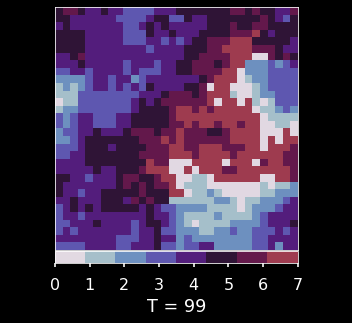

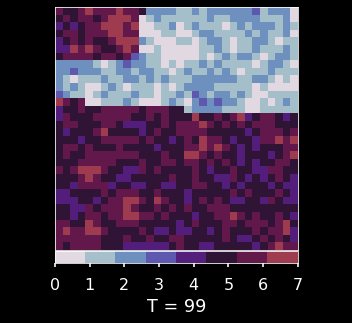

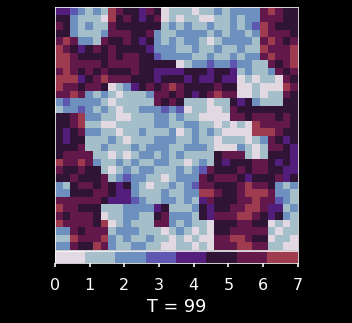

In [6]:
import sys; sys.path.insert(0, '../')
import matplotlib as mpl
from PlexSim.plexsim.models import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as fan
from mpl_toolkits.axes_grid1 import make_axes_locatable as mal
from matplotlib import style
style.use('dark_background')

def init(model, N, cmap):
    
    fig, ax = plt.subplots(figsize = (5,5))
    n = int(np.sqrt(m.nNodes))
    res = m.simulate(N).reshape(N, n, n)
#     cr = np.linspace(0, 255, m.nStates, dtype = int)
#     cmap = mpl.colors.LinearSegmentedColormap.from_list(None, \
#                                 plt.cm.viridis(cr), \
#                                 cr.size)
    
    h = ax.imshow(res[0], vmin = m.agentStates[0], \
              vmax = m.agentStates[-1], cmap = cmap)
#     ax.axis('square')
    
    div = mal(ax)
    
    size = "5%"
    pad  = .01
    
    cbr = div.append_axes('bottom', size, pad = pad)
    tmp = fig.colorbar(h, cax = cbr, ticks = m.agentStates, \
                      orientation = 'horizontal')
#     tmp.set_ticklabels("A B C".split())
#     tmp.set_ticks(np.arange(0, m.nStatefs))
    mainax = fig.add_subplot(111, frameon = 0, \
                         xticks = [], \
                         yticks = [])
    mainax.set_xlabel(f'T = 0', labelpad = 35)
    
    ax.set(xticks = [], yticks = [])
    fig.tight_layout()
    return fig, ax, mainax, h, res

def update(t):
    h.set_data(results[t])
    mainax.set_xlabel(f'T = {t}', labelpad = 35)
    fig.canvas.flush_events()
    fig.canvas.draw()
    return h,
n = 32
g = nx.grid_graph([n, n])
# g = nx.grid_2d_graph(n, n, periodic = 1)



m = 4 * 2
rules = nx.complete_graph(m)
et = {(u, v): -1 for u, v in rules.edges()}
print(et)
nx.set_edge_attributes(rules, name = 'weight',  values = et)
# rules.add_edge(m-1, 0, weight = 0)

# rules.add_edge(0, 1)
# rules.add_edge(1, 2)
# rules.add_edge(2, 0, weight = 0)

eigen = 0.
RULES = [nx.Graph()]
gg = nx.complete_graph(m//2, nx.DiGraph())
for u, v in gg.edges():
    rules[u][v]['weight'] = 0
gg = nx.path_graph(m // 2, nx.DiGraph())
for u, v in gg.edges():
    rules[u][v]['weight'] = 1
    
gg = nx.complete_graph(m//2,  nx.DiGraph())
gg = nx.relabel_nodes(gg, {i : (m-1) - i for i in gg.nodes() })
for u, v in gg.edges():
    rules[u][v]['weight'] = 0
    
gg = nx.path_graph(m // 2, nx.DiGraph())
gg = nx.relabel_nodes(gg, {i : (m-1) - i for i in gg.nodes() })
for u, v in gg.edges():
    rules[u][v]['weight'] = 1

from copy import deepcopy
RULES.append(deepcopy(rules))
RULES.append(deepcopy(rules))

# rules.add_edge(2, 0)
N      = 100
# N      = 10
frames = np.linspace(0, N-1, dtype = int)
# frames = np.geomspace(1, N-1, dtype = int)

t = np.geomspace(.001, 5, 30)
mags = []

import matplotlib as mpl
cmap = mpl.colors.LinearSegmentedColormap.from_list(\
          None, plt.cm.twilight(np.linspace(0, 1, m + 3)[:m]), m)

settings = dict(graph = g,\
                updateType = 'async',\
                t = 0.5,\
               agentStates = np.arange(m).tolist())
settings['cmap'] = cmap
for idx, rule in enumerate(RULES):
    if idx > 1:
        settings['memorySize'] = 1
        settings['memento']    = 1
    m = Potts(
             rules = rule,\
             **settings)
    fig, ax, mainax, h, results = init(m, N, settings.get('cmap'))
    an = fan(fig, update, frames = frames,\
            blit = True, interval = 10000)
    title = 'potts_' 
    if rule.number_of_nodes():
        title += "valchain"
    else:
        title += "normal"
    if mem := settings.get('memorySize'):
            title += f'_memorysizze{mem}'
    an.save(title + ".gif", \
            codec = 'png',\
            writer = 'imagemagick', fps = 60,\
            dpi = 300,\
    #        savefig_kwargs={'transparent': True, 'facecolor': 'none'}, 
           )

    fig.show()
    mags.append(m.magnetize(temps = t, n = 10))

<ipython-input-2-e8a54f07d0bd>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


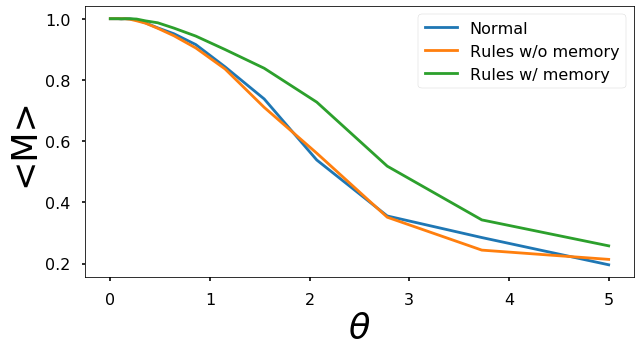

In [2]:
from matplotlib import style
style.use('fivethirtyeight default'.split())
%matplotlib inline
from matplotlib import style; style.use('seaborn-poster')
fig, ax = plt.subplots(figsize = (9,5))
ax.plot(t, mags[0][0], label = 'Normal')
ax.plot(t, mags[1][0], label = 'Rules w/o memory')
ax.plot(t, mags[2][0], label = 'Rules w/ memory')
ax.set_xlabel(\
        r"$\theta$",\
        fontsize = 35)
ax.set_ylabel( \
            "<M>",\
                   fontsize = 35)
ax.legend()
fig.tight_layout()
fig.savefig('potts_norm_val.png', dpi = 300,\
           transparent = 1)
fig.show()


<ipython-input-7-81ccf8c73af1>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


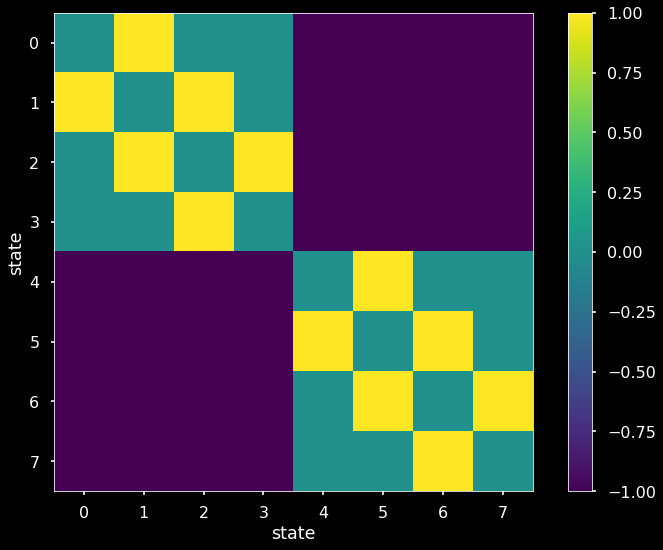

In [7]:
fig, ax = plt.subplots()

h = ax.imshow(nx.adj_matrix(RULES[1]).todense(), interpolation = None)
ax.set(xlabel = 'state', ylabel = 'state')
fig.colorbar(h)
fig.show()